## Assignment 5

### SIR model

#### Using Euler method

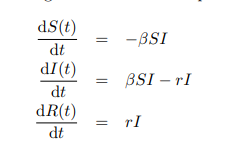

In [150]:
import pandas as pd

In [151]:
N = 10**6

In [152]:
def SIR_euler(beta, r, n=10**6, h=1):
    S = np.zeros(0, N)
    I = np.zeros(0, N)
    R = np.zeros(0, N)
    S[0] = N
    I[0] = 1
    R[0] = r_0
    for i in range(1, n):
        S[i] = S[i-1] + h*((-beta)*S[i-1]*I[i-1])
        I[i] = I[i-1] + h*(beta*S[i-1]*I[i-1] - r*I[i-1])
        R[i] = R[i-1] + h*(r*I[i-1])
    df = pd.DataFrame(list(zip(list(range(0, N)), S, I, R)),
               columns =['t', 'susceptible', 'infected', 'removed'])
    return df

In [153]:
beta = 0.05
r = 0.04
R_0 = beta*N/r

#### SIR model on a network

In [102]:
import networkx as nx
import random
import os
from matplotlib import pyplot as plt, animation
import imageio
import glob
from PIL import Image

In [146]:
def SIR_on_graph(G, p, starting_node=0):
    """
        Function that generates SIR model simulations on a graph with arguments:
        
        G (networkx.Graph()) - graph to simulate the model on
        p (float) - probability of infection 
    """
    d = {node : 'S' for node in G.nodes()}
    nx.set_node_attributes(G, d, 'state')

    #infected_node = random.choice(list(G.nodes()))
    d[starting_node] = 'I'
    nx.set_node_attributes(G, d, 'state')
    
    infected_list = [starting_node]
    infected_fraction = [len(infected_list)/N]
    while list(set(list(nx.get_node_attributes(G, 'state').values()))) != ['R']:
        new_infected_list = []
        for node in infected_list:
            d[node] = 'R'
            for new_infected in G.neighbors(node):
                if G.nodes[new_infected]['state'] == 'S' and random.uniform(0, 1) > p:
                    d[new_infected] = 'I'
                    new_infected_list.append(new_infected)
        nx.set_node_attributes(G, d, 'state')
        infected_list = new_infected_list
        infected_fraction.append(len(infected_list)/N)
    
#     label = nx.get_node_attributes(G, 'state') 
#     nx.draw(G, labels=label)
    return G, infected_fraction

In [ ]:
def MC_SIR(G, steps, starting_node=0):
    
    for i in range(steps):
        

In [147]:
RG = nx.erdos_renyi_graph(100, 0.4)
WSM = nx.watts_strogatz_graph(100, 15, 0.6)
BAM = nx.barabasi_albert_graph(100, 10)

## Analysis of infected fraction

#### Random graph

In [149]:
_, RG_infected_025 = SIR_on_graph(RG, 0.25)
_, RG_infected_05 = SIR_on_graph(RG, 0.5)
_, RG_infected_075 = SIR_on_graph(RG, 0.75)

_, WSM_infected_025 = SIR_on_graph(WSM, 0.25)
_, WSM_infected_05 = SIR_on_graph(WSM, 0.5)
_, WSM_infected_075 = SIR_on_graph(WSM, 0.75)

_, BAM_infected_025 = SIR_on_graph(BAM, 0.25)
_, BAM_infected_05 = SIR_on_graph(BAM, 0.5)
_, BAM_infected_075 = SIR_on_graph(BAM, 0.75)

KeyboardInterrupt: 

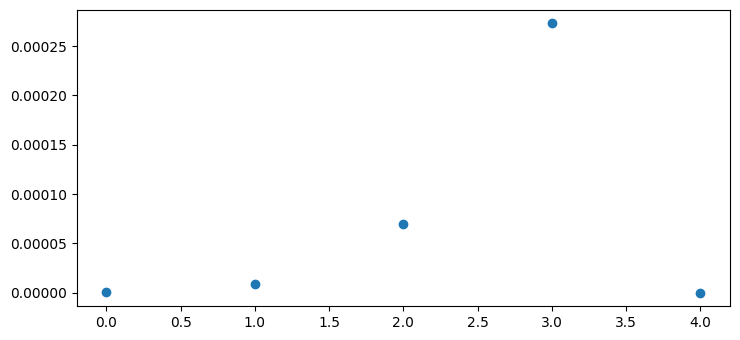

In [144]:
plt.scatter(range(0, len(RG_infected_075)), RG_infected_075)

## Visualization attempt (not succeeded)

In [85]:
def make_gif_graph(frame_folder, gif_name):
    if not os.path.exists('images'):
        os.makedirs('images')
    frames = [Image.open(image) for image in glob.glob(f"{frame_folder}/graph*.JPG")]
    frame_one = frames[0]
    frame_one.save(f"images/{gif_name}.gif", format="GIF", append_images=frames,
               save_all=True, duration=100, loop=0)

C:\Users\Kasia\AppData\Local\Temp\ipykernel_11676\1796811982.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  ani.save(f, writer=writergif)
C:\Users\Kasia\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
C:\Users\Kasia\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


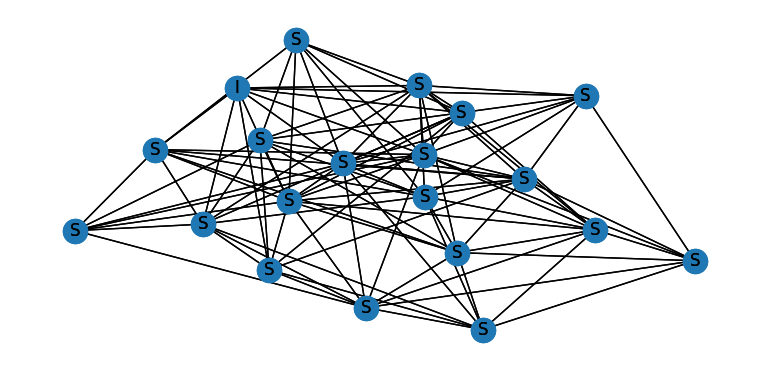

In [118]:
p = 0.6
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()

G = nx.erdos_renyi_graph(20, 0.5)

d = {node : 'S' for node in G.nodes()}
nx.set_node_attributes(G, d, 'state')

infected_node = random.choice(list(G.nodes()))
d[infected_node] = 'I'
nx.set_node_attributes(G, d, 'state')

pos = nx.spring_layout(G)
label = nx.get_node_attributes(G, 'state') 
nx.draw(G, labels=label, pos=pos)

def animate(frame):
    
    infected_list = [infected_node]

#     #while list(set(list(nx.get_node_attributes(G, 'state').values()))) != ['R']:
#     for i in range(steps):
    new_infected_list = []
    for node in infected_list:
        d[node] = 'R'
        for new_infected in G.neighbors(node):
            if G.nodes[new_infected]['state'] == 'S' and random.uniform(0, 1) > p:
                d[new_infected] = 'I'
                new_infected_list.append(new_infected)
    nx.set_node_attributes(G, d, 'state')
    infected_list = new_infected_list
    
label = nx.get_node_attributes(G, 'state') 
nx.draw(G, labels=label, pos=pos)

ani = animation.FuncAnimation(fig, animate, frames=10, interval=1000, repeat=True)

f = "animation.gif" 
writergif = animation.PillowWriter(fps=200) 
ani.save(f, writer=writergif)

In [130]:
g = nx.complete_graph(20)

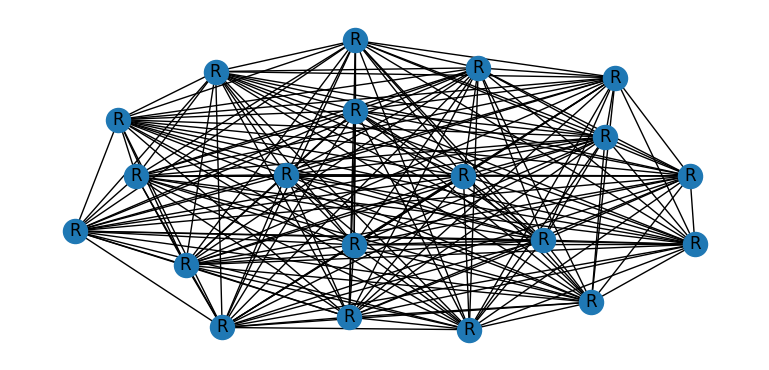

In [131]:
g = SIR_on_graph(g, 0.5)